In [1]:
import keras
from keras.datasets import imdb
import numpy as np

keras.__version__

Using TensorFlow backend.


'2.2.4'

# 1. Data Loading

##### __IMDB 데이터셋__  

인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용  
이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape

((25000,), (25000,))

##### TRAIN_DATA Decoding

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print("[INDEX][3] {}".format(reverse_word_index[3]))

decoded_reviwes = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print("[REVIEW][TRAIN_0] {}".format(decoded_reviwes))

[INDEX][3] a
[REVIEW][TRAIN_0] ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# 2. Data Preprocessing

##### Encoding

In [5]:
# One Hot Encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

##### Type 변환

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
train_labels, y_train

(array([1, 0, 0, ..., 0, 1, 0], dtype=int64),
 array([1., 0., 0., ..., 0., 1., 0.], dtype=float32))

# 3. Modeling

In [9]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses, metrics

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])  

# 4. Model Training

In [53]:
X_val = X_train[:10000]
X_model_train = X_train[10000:]

y_val = y_train[:10000]
y_model_train = y_train[10000:]


In [54]:
history = model.fit(x=X_model_train, y=y_model_train, 
                   batch_size=512,
                   epochs=10,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 23s 2ms/step - loss: 0.4956 - binary_accuracy: 0.7871 - val_loss: 0.3832 - val_binary_accuracy: 0.8596
Epoch 2/10
15000/15000 [==============================] - 7s 479us/step - loss: 0.2963 - binary_accuracy: 0.9044 - val_loss: 0.3009 - val_binary_accuracy: 0.8863
Epoch 3/10
15000/15000 [==============================] - 6s 404us/step - loss: 0.2150 - binary_accuracy: 0.9298 - val_loss: 0.2764 - val_binary_accuracy: 0.8912
Epoch 4/10
15000/15000 [==============================] - 6s 398us/step - loss: 0.1729 - binary_accuracy: 0.9436 - val_loss: 0.2853 - val_binary_accuracy: 0.8833
Epoch 5/10
15000/15000 [==============================] - 6s 375us/step - loss: 0.1394 - binary_accuracy: 0.9555 - val_loss: 0.2888 - val_binary_accuracy: 0.8833
Epoch 6/10
15000/15000 [==============================] - 6s 405us/step - loss: 0.1148 - binary_accuracy: 0.9648 - val_loss: 0.3072 - val_bin

In [55]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


### Training Result

In [56]:
import matplotlib.pyplot as plt

In [57]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

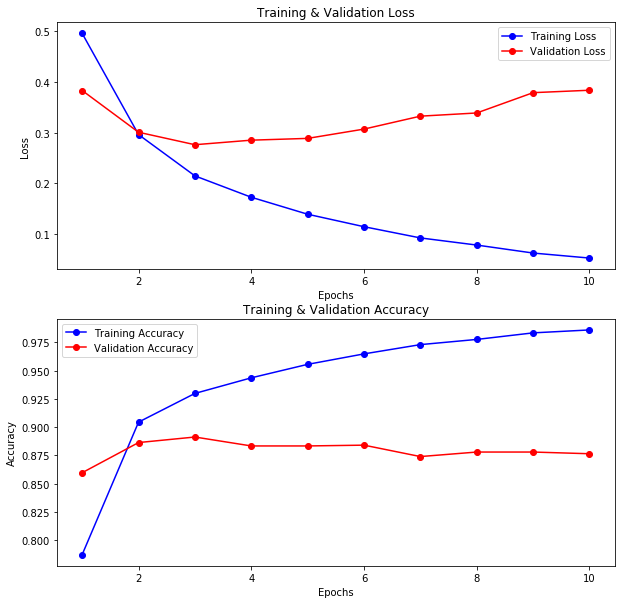

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. Prediction

In [62]:
results = model.evaluate(X_test, y_test)
results

25000/25000 [==============================] - 8s 303us/step


[0.42027390530586245, 0.86472]